<a href="https://colab.research.google.com/github/seunghwan1228/Reboot-Box-Plots-for-Education/blob/master/School_Budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings 
from sklearn.multiclass import OneVsOneClassifier
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from scipy.sparse import csr_matrix, hstack
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/input/Reboot_education_data/TrainingData.csv')

In [69]:
train_df.head()

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [0]:
label = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']

In [0]:
train_X = train_df.drop(label, axis=1)
train_y = train_df[label]

In [72]:
train_X.head()

,Unnamed: 0,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [73]:
train_y.head()

,Function,Object_Type,Operating_Status,Position_Type,Pre_K,Reporting,Sharing,Student_Type,Use
0,Teacher Compensation,NO_LABEL,PreK-12 Operating,Teacher,NO_LABEL,School,School Reported,NO_LABEL,Instruction
1,NO_LABEL,NO_LABEL,Non-Operating,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL
2,Teacher Compensation,Base Salary/Compensation,PreK-12 Operating,Teacher,Non PreK,School,School Reported,Unspecified,Instruction
3,Substitute Compensation,Benefits,PreK-12 Operating,Substitute,NO_LABEL,School,School Reported,Unspecified,Instruction
4,Substitute Compensation,Substitute Compensation,PreK-12 Operating,Teacher,NO_LABEL,School,School Reported,Unspecified,Instruction


## Analyze Label 

NA -> NO_LABEL

In [0]:
def check_label(x):
  value_count = train_y[f'{x}'].value_counts()
  nuniques = train_y[f'{x}'].nunique()
  print(value_count)
  print()
  print('nuniques: ', nuniques)

In [0]:
label = ['Function', 'Object_Type', 'Operating_Status', 'Position_Type', 'Pre_K', 'Reporting', 'Sharing', 'Student_Type', 'Use']

In [0]:
for i in label:
  print('-----------------')
  print(i)
  print('-----------------')
  check_label(f'{i}')
  print('-----------------')

-----------------
Function
-----------------
Teacher Compensation                               86354
Substitute Compensation                            62215
NO_LABEL                                           59579
Aides Compensation                                 19858
Instructional Materials & Supplies                 19711
Facilities & Maintenance                           19617
Professional Development                           19102
Student Transportation                             14371
Food Services                                      14203
School Administration                              13055
Enrichment                                         10686
Extended Time & Tutoring                            8375
Curriculum Development                              7603
Physical Health & Services                          5929
Social & Emotional                                  5003
Library & Media                                     4522
Special Population Program Management & Sup

## encode the label

In [74]:
train_y.head()

,Function,Object_Type,Operating_Status,Position_Type,Pre_K,Reporting,Sharing,Student_Type,Use
0,Teacher Compensation,NO_LABEL,PreK-12 Operating,Teacher,NO_LABEL,School,School Reported,NO_LABEL,Instruction
1,NO_LABEL,NO_LABEL,Non-Operating,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL
2,Teacher Compensation,Base Salary/Compensation,PreK-12 Operating,Teacher,Non PreK,School,School Reported,Unspecified,Instruction
3,Substitute Compensation,Benefits,PreK-12 Operating,Substitute,NO_LABEL,School,School Reported,Unspecified,Instruction
4,Substitute Compensation,Substitute Compensation,PreK-12 Operating,Teacher,NO_LABEL,School,School Reported,Unspecified,Instruction


In [0]:
train_y_dummy = pd.get_dummies(train_y, sparse=True)

In [76]:
train_y_dummy.shape

(400277, 104)

## Analysis train_X

In [0]:
train_X.head()

,Unnamed: 0,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [0]:
train_X.index = train_X.iloc[:, 0]

In [0]:
train_X.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
train_X.head()

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
Unnamed: 0,,,,,,,,,,,,,,,,
134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [0]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 16 columns):
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Function_Description      342195 non-null object
Facility_or_Department    53886 non-null object
Position_Extra            264764 non-null object
Total                     395722 non-null float64
Program_Description       304660 non-null object
Fund_Description          202877 non-null object
Text_1                    292285 non-null object
dtypes: float64(2), object(14)
memory usage: 51.9+ MB


### two features are float types, chekc float first

FTE : 
If an employee, the percentage of full-time that the employee works.

Total :
The total cost of the expenditure.

In [0]:
train_float = train_X[['FTE', 'Total']]

In [0]:
train_float.head()

,FTE,Total
0,1.0,50471.810
1,NaN,3477.860
2,1.0,62237.130
3,NaN,22.300
4,NaN,54.166


In [0]:
train_float.shape

(400277, 2)

In [0]:
train_float.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


(-1, 2)

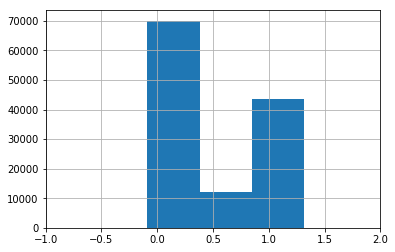

In [0]:
plt.figure()
train_float.FTE.hist(bins=100)
plt.xlim(-1, 2)

In [0]:
train_float.FTE.isna().sum()

274206

In [0]:
train_float.Total.isna().sum()

4555

### For the numeric data, requires to fill na pre-process

### non_numeric features

In [0]:
train_char = train_X.drop(['FTE', 'Total'], axis=1)

In [0]:
train_char.head()

,Unnamed: 0,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,Function_Description,Facility_or_Department,Position_Extra,Program_Description,Fund_Description,Text_1
0,134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,NaN,NaN,KINDERGARTEN,KINDERGARTEN,General Fund,NaN
1,206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,NaN,NaN,TEACHER,Instruction - Regular,General Purpose School,NaN
3,364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


### check the features

In [0]:
def check_feature(df, x):
  value_count = df[f'{x}'].value_counts()
  nuniques = df[f'{x}'].nunique()
  print(value_count)
  print()
  print('nuniques: ', nuniques)

In [0]:
train_char.columns

Index(['Unnamed: 0', 'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Program_Description',
       'Fund_Description', 'Text_1'],
      dtype='object')

In [0]:
for i in train_char.columns:
  print('-----------------')
  print(i)
  print('-----------------')
  check_feature(train_char, f'{i}')
  print('-----------------')

### preprocessing 

option 1 : one-hot encoding for all char features

option 2 : concat the char feature, and perform TF-IDF, hashing, countvectorize

## Option 1

In [0]:
# train_char_one_hot = pd.get_dummies(train_char, dtype=np.uint8)

In [0]:
# train_char_one_hot.head()

In [0]:
# train_char_one_hot.info()

In [0]:
train_char_one_hot_sparse = pd.get_dummies(train_char, sparse=True, dtype=np.uint8)

In [0]:
train_char_one_hot_sparse.head()

,"Object_Description_""Building Purchase, Construction Or Improvements""",Object_Description_*******SUSPENSE*******,Object_Description_ADDITIONAL INCOME ALLOWANCE,Object_Description_ADDITIONAL/EXTRA DUTY PAY/STIP,Object_Description_ADMINISTRATIVE FEES,Object_Description_ADMINISTRATIVE PREMIUM,Object_Description_ADMINISTRATOR,Object_Description_ADULT PART TIME,Object_Description_ADVERTISING,Object_Description_AIDES AND PARAPROFESSIONALS,Object_Description_ALL OTHER SUPPLEMENTS,Object_Description_ARCHITECTURAL&ENGINEERING FEES,Object_Description_ATHLETIC SUPPLEMENTS,Object_Description_ATHLETICS PERSONNEL,Object_Description_ATTORNEY FEES,Object_Description_AUDIO VISUAL MATERIALS,Object_Description_AUDIT FEES,Object_Description_AUDIT SERVICES,Object_Description_AUTO ALLOWANCE,Object_Description_Accident Insurance - Student Activity Participants,Object_Description_Advertising,Object_Description_Awards/Prizes for Competition,Object_Description_BANKING SERVICE FEES,Object_Description_BOARD MEMBERS AND ATTORNEYS,Object_Description_BONUS PAY,Object_Description_BONUSES,Object_Description_BOOKS (OTHER THAN TEXTBOOKS) AND PERIODICALS,Object_Description_BOOKS AND PERIODICALS,Object_Description_BOTTLED GAS,Object_Description_BOTTLED GAS,"Object_Description_BUILDING ACQUISITION, CONSTRUCTION AND IMPROVEMENT",Object_Description_BUILDINGS,Object_Description_BUILDINGS *,Object_Description_BUILDINGS AND FIXED EQUIPMENT,Object_Description_BUS DRIVERS,Object_Description_BUSES,Object_Description_Bakery Products,Object_Description_Bank Charges,Object_Description_Benefits and Claims,Object_Description_Bond Principal,...,Text_1_UNIV,Text_1_UNIV STE,Text_1_UNIV HEALTH -,Text_1_UNIV HOSPITALS HEALTH SYS,Text_1_UNIV NEXT STEP,"Text_1_UNIV PRE-K, PARENT NEEDS",Text_1_UNIVERSITY,Text_1_UNIVERSITY - P.D.,Text_1_UPK - ITEMAD FY,Text_1_UPK ITEMAD,Text_1_UPK MARION STERLING,Text_1_USING PHONICS/MCGINTY,Text_1_VARIOUS-ARTS ED-DRUMLINE,Text_1_VARIOUS-JOHN HAY SCHOLAR,Text_1_VARIOUS-UNIFORMS CAMPAIGN,Text_1_VIRTUAL INSTRUCTION PGM,Text_1_VOC & CAREER TRANSITION,Text_1_VOC ED TECH MATCH,Text_1_VOCATIONAL EDUCATION,Text_1_VOCATIONAL EDUCATION,Text_1_VOCATIONAL EQUIPMENT,Text_1_VOLUNTARY PRE-K ASSESSMENT,Text_1_VOLUNTEER/FINGERPRINTING PROG,Text_1_VPK,Text_1_VPK SUMMER,Text_1_Vision & Hearing Services,Text_1_WAITING TIME,Text_1_WAL-MART/SAM'S CLUB FOUND,Text_1_WARM HANDS READING BOOKS,Text_1_WELLNESS BLOCK,Text_1_WELLNESS BLOCK GRANT,Text_1_WELLNESS BLOCK GRANT,Text_1_WORKERS' COMP OFFICE,Text_1_WORKFORCE INVESTMENT ACT,Text_1_WORKSHOP,Text_1_WirelessContvty-Host,Text_1_YEAR ROUND YOUTH TRAINING,Text_1_YOUTH SERVICES,Text_1_Youth Endowment of East ITEMFF,Text_1_ZOO-NE OH ENVIRON
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_char_one_hot_sparse.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 8938 entries, Object_Description_"Building Purchase, Construction Or Improvements" to Text_1_ZOO-NE OH ENVIRON
dtypes: Sparse[uint8, 0](8938)
memory usage: 27.1 MB


### concat numeric features with fill na and standard scaling

In [0]:
train_float.head()

,FTE,Total
Unnamed: 0,,
134338,1.0,50471.810
206341,NaN,3477.860
326408,1.0,62237.130
364634,NaN,22.300
47683,NaN,54.166


In [0]:
train_x_index = train_float.index

In [0]:
train_float.FTE.mean()

0.4267939847030696

In [0]:
train_float.Total.mean()

13105.85682779094

In [0]:
train_float.FTE.fillna(train_float.FTE.mean(), inplace=True)
train_float.Total.fillna(train_float.Total.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
train_float.isna().sum()

FTE      0
Total    0
dtype: int64

In [0]:
train_float.values

array([[1.00000000e+00, 5.04718100e+04],
       [4.26793985e-01, 3.47786000e+03],
       [1.00000000e+00, 6.22371300e+04],
       ...,
       [1.00000000e+00, 4.90229000e+03],
       [4.26793985e-01, 4.02029000e+03],
       [4.26793985e-01, 4.65300000e+01]])

In [0]:
scaler = StandardScaler()

In [0]:
train_float_scaled = scaler.fit_transform(train_float.values)

In [0]:
train_float_scaled_df = pd.DataFrame(train_float_scaled)

In [0]:
train_float_scaled_df.columns = ['FTE', 'Total']

In [0]:
train_float_scaled_df.head()

,FTE,Total
0,1.780716e+00,0.102058
1,-6.760054e-14,-0.026297
2,1.780716e+00,0.134193
3,-6.760054e-14,-0.035735
4,-6.760054e-14,-0.035648


In [0]:
train_float_scaled_df.index = train_x_index

In [0]:
train_float_scaled_df.index

Int64Index([134338, 206341, 326408, 364634,  47683, 229958, 417668, 126378,
            275539,  85262,
            ...
            397424, 375092, 220181, 307423,  46691, 109283, 102430, 413949,
            433672, 415831],
           dtype='int64', name='Unnamed: 0', length=400277)

In [0]:
train_float_scaled_df.shape

(400277, 2)

In [0]:
train_float_scaled_array = train_float_scaled_df.values

In [0]:
train_char_one_hot_sparse.shape

(400277, 8938)

In [0]:
train_char_one_hot_sparse.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 8938 entries, Object_Description_"Building Purchase, Construction Or Improvements" to Text_1_ZOO-NE OH ENVIRON
dtypes: Sparse[uint8, 0](8938)
memory usage: 27.1 MB


Feature Union

In [0]:
train_df.head()

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [0]:
full_merge = pd.merge(train_float_scaled_df, train_char_one_hot_sparse, left_index=True, right_index=True)

In [0]:
full_merge.shape

(400277, 8940)

In [0]:
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 8940 entries, FTE to Text_1_ZOO-NE OH ENVIRON
dtypes: Sparse[uint8, 0](8938), float64(2)
memory usage: 33.2 MB


In [0]:
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Columns: 8940 entries, FTE to Text_1_ZOO-NE OH ENVIRON
dtypes: Sparse[uint8, 0](8938), float64(2)
memory usage: 33.2 MB


### Full_merge <- one_hot encoded with standard scaled,  : Train_X  [option 1]

In [0]:
print('X : ', full_merge.shape)
print('Y : ', train_y_dummy.shape)

X :  (400277, 8940)
Y :  (400277, 104)


In [0]:
full_merge.head()

,FTE,Total,"Object_Description_""Building Purchase, Construction Or Improvements""",Object_Description_*******SUSPENSE*******,Object_Description_ADDITIONAL INCOME ALLOWANCE,Object_Description_ADDITIONAL/EXTRA DUTY PAY/STIP,Object_Description_ADMINISTRATIVE FEES,Object_Description_ADMINISTRATIVE PREMIUM,Object_Description_ADMINISTRATOR,Object_Description_ADULT PART TIME,Object_Description_ADVERTISING,Object_Description_AIDES AND PARAPROFESSIONALS,Object_Description_ALL OTHER SUPPLEMENTS,Object_Description_ARCHITECTURAL&ENGINEERING FEES,Object_Description_ATHLETIC SUPPLEMENTS,Object_Description_ATHLETICS PERSONNEL,Object_Description_ATTORNEY FEES,Object_Description_AUDIO VISUAL MATERIALS,Object_Description_AUDIT FEES,Object_Description_AUDIT SERVICES,Object_Description_AUTO ALLOWANCE,Object_Description_Accident Insurance - Student Activity Participants,Object_Description_Advertising,Object_Description_Awards/Prizes for Competition,Object_Description_BANKING SERVICE FEES,Object_Description_BOARD MEMBERS AND ATTORNEYS,Object_Description_BONUS PAY,Object_Description_BONUSES,Object_Description_BOOKS (OTHER THAN TEXTBOOKS) AND PERIODICALS,Object_Description_BOOKS AND PERIODICALS,Object_Description_BOTTLED GAS,Object_Description_BOTTLED GAS,"Object_Description_BUILDING ACQUISITION, CONSTRUCTION AND IMPROVEMENT",Object_Description_BUILDINGS,Object_Description_BUILDINGS *,Object_Description_BUILDINGS AND FIXED EQUIPMENT,Object_Description_BUS DRIVERS,Object_Description_BUSES,Object_Description_Bakery Products,Object_Description_Bank Charges,...,Text_1_UNIV,Text_1_UNIV STE,Text_1_UNIV HEALTH -,Text_1_UNIV HOSPITALS HEALTH SYS,Text_1_UNIV NEXT STEP,"Text_1_UNIV PRE-K, PARENT NEEDS",Text_1_UNIVERSITY,Text_1_UNIVERSITY - P.D.,Text_1_UPK - ITEMAD FY,Text_1_UPK ITEMAD,Text_1_UPK MARION STERLING,Text_1_USING PHONICS/MCGINTY,Text_1_VARIOUS-ARTS ED-DRUMLINE,Text_1_VARIOUS-JOHN HAY SCHOLAR,Text_1_VARIOUS-UNIFORMS CAMPAIGN,Text_1_VIRTUAL INSTRUCTION PGM,Text_1_VOC & CAREER TRANSITION,Text_1_VOC ED TECH MATCH,Text_1_VOCATIONAL EDUCATION,Text_1_VOCATIONAL EDUCATION,Text_1_VOCATIONAL EQUIPMENT,Text_1_VOLUNTARY PRE-K ASSESSMENT,Text_1_VOLUNTEER/FINGERPRINTING PROG,Text_1_VPK,Text_1_VPK SUMMER,Text_1_Vision & Hearing Services,Text_1_WAITING TIME,Text_1_WAL-MART/SAM'S CLUB FOUND,Text_1_WARM HANDS READING BOOKS,Text_1_WELLNESS BLOCK,Text_1_WELLNESS BLOCK GRANT,Text_1_WELLNESS BLOCK GRANT,Text_1_WORKERS' COMP OFFICE,Text_1_WORKFORCE INVESTMENT ACT,Text_1_WORKSHOP,Text_1_WirelessContvty-Host,Text_1_YEAR ROUND YOUTH TRAINING,Text_1_YOUTH SERVICES,Text_1_Youth Endowment of East ITEMFF,Text_1_ZOO-NE OH ENVIRON
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134338,1.780716e+00,0.102058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206341,-6.760054e-14,-0.026297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
326408,1.780716e+00,0.134193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364634,-6.760054e-14,-0.035735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47683,-6.760054e-14,-0.035648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
full_merge_float = full_merge.iloc[:, 0:2]
full_merge_sparse = full_merge.iloc[:, 3:]

In [0]:
full_merge_float.shape

(400277, 2)

In [0]:
full_merge_sparse.shape

(400277, 8937)

In [0]:
spar_matrix = csr_matrix(full_merge_sparse)

In [0]:
spar_matrix

<400277x8937 sparse matrix of type '<class 'numpy.uint8'>'
	with 2940470 stored elements in Compressed Sparse Row format>

In [0]:
spar_stack = hstack([spar_matrix, full_merge_float])

In [0]:
spar_stack

<400277x8939 sparse matrix of type '<class 'numpy.float64'>'
	with 3741024 stored elements in COOrdinate format>

### Train test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(spar_stack, train_y_dummy, test_size = 0.2, random_state = 42)

In [0]:
print('X_train : ', X_train.shape)
print('y_train : ', y_train.shape)
print('--------')
print('X_test : ', X_test.shape)
print('y_test : ', y_test.shape)

X_train :  (320221, 8939)
y_train :  (320221, 104)
--------
X_test :  (80056, 8939)
y_test :  (80056, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(random_state=42, solver='lbfgs'), n_jobs=-1)

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)

In [0]:
logit.score(X_train, y_train)

0.9110364404583084

In [0]:
logit.score(X_test, y_test)

0.9024058159288498

In [0]:
rfc_clf = OneVsRestClassifier(RandomForestClassifier(random_state=42), n_jobs=-1)

In [0]:
rfc_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
                                           

In [0]:
rfc_clf.score(X_train, y_train)

0.9845544171056864

In [0]:
rfc_clf.score(X_test, y_test)

0.901868691915659

## Option 2

option 2 : concat the char feature, and perform TF-IDF, hashing, countvectorize

In [77]:
train_y_dummy.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,...,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Reporting_NO_LABEL,Reporting_Non-School,Reporting_School,Sharing_Leadership & Management,Sharing_NO_LABEL,Sharing_School Reported,Sharing_School on Central Budgets,Sharing_Shared Services,Student_Type_Alternative,Student_Type_At Risk,Student_Type_ELL,Student_Type_Gifted,Student_Type_NO_LABEL,Student_Type_Poverty,Student_Type_PreK,Student_Type_Special Education,Student_Type_Unspecified,Use_Business Services,Use_ISPD,Use_Instruction,Use_Leadership,Use_NO_LABEL,Use_O&M,Use_Pupil Services & Enrichment,Use_Untracked Budget Set-Aside
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [78]:
train_X.head()

,Unnamed: 0,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [0]:
numeric_feature = train_X[['FTE', 'Total']]
char_feature = train_X.drop(['FTE', 'Total'], axis=1)

In [0]:
char_feature.fillna('', inplace=True)

In [81]:
char_feature.head()

,Unnamed: 0,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,Function_Description,Facility_or_Department,Position_Extra,Program_Description,Fund_Description,Text_1
0,134338,,,,Teacher-Elementary,,,,,,,KINDERGARTEN,KINDERGARTEN,General Fund,
1,206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,,,,RGN GOB,,UNDESIGNATED,BUILDING IMPROVEMENT SERVICES,,BUILDING IMPROVEMENT SERVICES
2,326408,Personal Services - Teachers,,,TCHER 2ND GRADE,,Regular Instruction,,,,,TEACHER,Instruction - Regular,General Purpose School,
3,364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,,,,UNALLOC BUDGETS/SCHOOLS,,PROFESSIONAL-INSTRUCTIONAL,GENERAL MIDDLE/JUNIOR HIGH SCH,,REGULAR INSTRUCTION
4,47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,,,,NON-PROJECT,,PROFESSIONAL-INSTRUCTIONAL,GENERAL HIGH SCHOOL EDUCATION,,REGULAR INSTRUCTION


In [0]:
char_feature.index = train_X['Unnamed: 0']
char_feature.drop('Unnamed: 0', axis=1, inplace=True)

In [83]:
char_feature.head()

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,Function_Description,Facility_or_Department,Position_Extra,Program_Description,Fund_Description,Text_1
Unnamed: 0,,,,,,,,,,,,,,
134338,,,,Teacher-Elementary,,,,,,,KINDERGARTEN,KINDERGARTEN,General Fund,
206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,,,,RGN GOB,,UNDESIGNATED,BUILDING IMPROVEMENT SERVICES,,BUILDING IMPROVEMENT SERVICES
326408,Personal Services - Teachers,,,TCHER 2ND GRADE,,Regular Instruction,,,,,TEACHER,Instruction - Regular,General Purpose School,
364634,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,,,,UNALLOC BUDGETS/SCHOOLS,,PROFESSIONAL-INSTRUCTIONAL,GENERAL MIDDLE/JUNIOR HIGH SCH,,REGULAR INSTRUCTION
47683,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,,,,NON-PROJECT,,PROFESSIONAL-INSTRUCTIONAL,GENERAL HIGH SCHOOL EDUCATION,,REGULAR INSTRUCTION


In [84]:
numeric_feature.head()

,FTE,Total
0,1.0,50471.810
1,NaN,3477.860
2,1.0,62237.130
3,NaN,22.300
4,NaN,54.166


In [0]:
numeric_feature.index = train_X['Unnamed: 0']

In [86]:
numeric_feature.head()

,FTE,Total
Unnamed: 0,,
134338,1.0,50471.810
206341,NaN,3477.860
326408,1.0,62237.130
364634,NaN,22.300
47683,NaN,54.166


In [0]:
numeric_feature['FTE'] = numeric_feature['FTE'].fillna(numeric_feature['FTE'].mean())
numeric_feature['Total'] = numeric_feature['Total'].fillna(numeric_feature['Total'].mean())

In [88]:
numeric_feature.head()

,FTE,Total
Unnamed: 0,,
134338,1.000000,50471.810
206341,0.426794,3477.860
326408,1.000000,62237.130
364634,0.426794,22.300
47683,0.426794,54.166


In [0]:
numeric_scaler = StandardScaler()

In [0]:
numeric_scaled = numeric_scaler.fit_transform(numeric_feature)

In [0]:
numeric_feature = pd.DataFrame(numeric_scaled, index = numeric_feature.index)

In [92]:
numeric_feature.head()

,0,1
Unnamed: 0,,
134338,1.780716e+00,0.102058
206341,-6.760054e-14,-0.026297
326408,1.780716e+00,0.134193
364634,-6.760054e-14,-0.035735
47683,-6.760054e-14,-0.035648


In [0]:
concat_char = lambda x: ''.join(x)

In [0]:
concat_text = char_feature.apply(concat_char, axis=1)

In [95]:
concat_text

Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
229958    CONTRA BENEFITSGENERAL FUNDCustodian - PT -  J...
417668    EDUCATIONALSPECIAL EDUCATION INSTRUCTIONLOCALS...
126378    EMPLOYEE BENEFITSGENERAL FUNDSub Manager, Food...
275539    EMPLOYEE BENEFITSGENERAL FUNDTeacher, Elementa...
85262     EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
304569    EQUIPMENT *Support Services - AdministrationEq...
330504    SUPPLIESPRIMARY GRADES PROGRAM INSTRUCTIONPRIM...
84272     Personal Services - TeachersTCHER P E (ELEM PO...
64760     Regular *Special InstructionCertificated Emplo...
21870     OTHER PERSONAL SERVICES       SUB TEACHER ALL ...
18698     Salaries And Wages For Substitute Professional...
169454    SUPPLIES           

In [0]:
text_pattern = re.compile(r'[A-Za-z0-9]+')

In [0]:
countvec = CountVectorizer(token_pattern=text_pattern)

In [0]:
count_vec = countvec.fit_transform(concat_text)

In [0]:
countvec.get_feature_names()

In [0]:
count_vec

<400277x17458 sparse matrix of type '<class 'numpy.int64'>'
	with 5425178 stored elements in Compressed Sparse Row format>

In [0]:
X = hstack([numeric_feature, count_vec])

In [0]:
X

<400277x17460 sparse matrix of type '<class 'numpy.float64'>'
	with 6225732 stored elements in COOrdinate format>

In [0]:
train_y_dummy.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,...,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Reporting_NO_LABEL,Reporting_Non-School,Reporting_School,Sharing_Leadership & Management,Sharing_NO_LABEL,Sharing_School Reported,Sharing_School on Central Budgets,Sharing_Shared Services,Student_Type_Alternative,Student_Type_At Risk,Student_Type_ELL,Student_Type_Gifted,Student_Type_NO_LABEL,Student_Type_Poverty,Student_Type_PreK,Student_Type_Special Education,Student_Type_Unspecified,Use_Business Services,Use_ISPD,Use_Instruction,Use_Leadership,Use_NO_LABEL,Use_O&M,Use_Pupil Services & Enrichment,Use_Untracked Budget Set-Aside
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, train_y_dummy, test_size=0.2, random_state=42)

In [0]:
print(X.shape, train_y_dummy.shape)
print('-----------------------')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400277, 17460) (400277, 104)
-----------------------
(320221, 17460) (320221, 104)
(80056, 17460) (80056, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.9128633037808264

In [0]:
logit.score(X_test, y_test)

0.900244828619966

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9841047276724512

In [0]:
rnd_clf.score(X_test, y_test)

0.9053037873488557

## Ngram

In [0]:
countvec_ngram = CountVectorizer(token_pattern=text_pattern, ngram_range=(1, 3))

In [0]:
count_vec_ngram = countvec_ngram.fit_transform(concat_text)

In [0]:
countvec_ngram.get_feature_names()

In [0]:
count_vec_ngram

<400277x157023 sparse matrix of type '<class 'numpy.int64'>'
	with 15903807 stored elements in Compressed Sparse Row format>

In [0]:
X_n_gram = hstack([numeric_feature, count_vec_ngram])

In [0]:
X_n_gram

<400277x157025 sparse matrix of type '<class 'numpy.float64'>'
	with 16704361 stored elements in COOrdinate format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_n_gram, train_y_dummy, test_size=0.2, random_state=42)

In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.9487104218648995

In [0]:
logit.score(X_test, y_test)

0.9261267113020886

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9850384578150715

In [0]:
rnd_clf.score(X_test, y_test)

0.9052163485560107

### Hashing Vectorize

In [0]:
concat_text[:5]

Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
dtype: object

In [0]:
train_y_dummy.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,"Function_Finance, Budget, Purchasing & Distribution",Function_Food Services,Function_Governance,Function_Human Resources,Function_Instructional Materials & Supplies,Function_Insurance,Function_Legal,Function_Library & Media,Function_NO_LABEL,Function_Other Compensation,Function_Other Non-Compensation,Function_Parent & Community Relations,Function_Physical Health & Services,Function_Professional Development,Function_Recruitment,Function_Research & Accountability,Function_School Administration,Function_School Supervision,Function_Security & Safety,Function_Social & Emotional,Function_Special Population Program Management & Support,Function_Student Assignment,Function_Student Transportation,Function_Substitute Compensation,Function_Teacher Compensation,Function_Untracked Budget Set-Aside,Function_Utilities,Object_Type_Base Salary/Compensation,Object_Type_Benefits,Object_Type_Contracted Services,...,Position_Type_Other,Position_Type_Physical Therapist,Position_Type_Principal,Position_Type_Psychologist,Position_Type_School Monitor/Security,Position_Type_Sec/Clerk/Other Admin,Position_Type_Social Worker,Position_Type_Speech Therapist,Position_Type_Substitute,Position_Type_TA,Position_Type_Teacher,Position_Type_Vice Principal,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Reporting_NO_LABEL,Reporting_Non-School,Reporting_School,Sharing_Leadership & Management,Sharing_NO_LABEL,Sharing_School Reported,Sharing_School on Central Budgets,Sharing_Shared Services,Student_Type_Alternative,Student_Type_At Risk,Student_Type_ELL,Student_Type_Gifted,Student_Type_NO_LABEL,Student_Type_Poverty,Student_Type_PreK,Student_Type_Special Education,Student_Type_Unspecified,Use_Business Services,Use_ISPD,Use_Instruction,Use_Leadership,Use_NO_LABEL,Use_O&M,Use_Pupil Services & Enrichment,Use_Untracked Budget Set-Aside
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [0]:
hash_vec = HashingVectorizer(token_pattern = text_pattern)

In [0]:
hash_result = hash_vec.fit_transform(concat_text)

In [0]:
hash_result

<400277x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 5425178 stored elements in Compressed Sparse Row format>

In [0]:
hash_full = hstack([hash_result, numeric_feature])

In [0]:
hash_full

<400277x1048578 sparse matrix of type '<class 'numpy.float64'>'
	with 6225732 stored elements in COOrdinate format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(hash_full, train_y_dummy, test_size=0.2, random_state = 1228)

In [0]:
print(X_train.shape, y_train.shape)
print('----------')
print(X_test.shape, y_test.shape)

(320221, 1048578) (320221, 104)
----------
(80056, 1048578) (80056, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver='lbfgs',random_state=1228))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1228,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.8307325253496803

In [0]:
logit.score(X_test, y_test)

0.8256345558109324

In [0]:
rnd_clf = RandomForestClassifier(random_state=1228)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1228,
                       verbose=0, warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9834645447987483

In [0]:
rnd_clf.score(X_test, y_test)

0.9043419606275607

hasing wiht ngram

In [0]:
print(numeric_feature[:5])
print(concat_text[:5])
print(train_y_dummy[:5])

                       0         1
Unnamed: 0                        
134338      1.780716e+00  0.102058
206341     -6.760054e-14 -0.026297
326408      1.780716e+00  0.134193
364634     -6.760054e-14 -0.035735
47683      -6.760054e-14 -0.035648
Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
dtype: object
   Function_Aides Compensation  ...  Use_Untracked Budget Set-Aside
0                            0  ...                               0
1                            0  ...                               0
2                            0  ...                               0
3                            0  ...                               0
4                            0  ...                               0

[5 rows x 104 columns

In [0]:
text_pattern = re.compile(r'[A-Za-z0-9]+')

In [0]:
hashing_vec = HashingVectorizer(token_pattern=text_pattern, ngram_range=(1, 3))

In [0]:
hasing_vec_ngram = hashing_vec.fit_transform(concat_text)

In [0]:
hasing_vec_ngram

<400277x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 15903336 stored elements in Compressed Sparse Row format>

In [0]:
hasing_vec_all = hstack([numeric_feature, hasing_vec_ngram])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(hasing_vec_all, train_y_dummy, test_size=0.2, random_state=1228)

In [0]:
print(X_train.shape, y_train.shape)

(320221, 1048578) (320221, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs', random_state=42))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.8699710512427354

In [0]:
logit.score(X_test, y_test)

0.8636954132107525

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9833927194031622

In [0]:
rnd_clf.score(X_test, y_test)

0.9039672229439393

tfidf

In [0]:
print(numeric_feature[:5])
print(concat_text[:5])
print(train_y_dummy[:5])

                       0         1
Unnamed: 0                        
134338      1.780716e+00  0.102058
206341     -6.760054e-14 -0.026297
326408      1.780716e+00  0.134193
364634     -6.760054e-14 -0.035735
47683      -6.760054e-14 -0.035648
Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
dtype: object
   Function_Aides Compensation  ...  Use_Untracked Budget Set-Aside
0                            0  ...                               0
1                            0  ...                               0
2                            0  ...                               0
3                            0  ...                               0
4                            0  ...                               0

[5 rows x 104 columns

In [0]:
tfidf_vec = TfidfVectorizer(token_pattern=text_pattern)

In [0]:
tfidf_char = tfidf_vec.fit_transform(concat_text)

In [0]:
tfidf_char

<400277x17458 sparse matrix of type '<class 'numpy.float64'>'
	with 5425178 stored elements in Compressed Sparse Row format>

In [0]:
tfidf_full = hstack([numeric_feature, tfidf_char])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_full, train_y_dummy, test_size=0.2, random_state=1228)

In [0]:
print(X_train.shape, y_train.shape)

(320221, 17460) (320221, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs', random_state=42))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.8654398056342338

In [0]:
logit.score(X_test, y_test)

0.8595608074347957

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9835238788211891

In [0]:
rnd_clf.score(X_test, y_test)

0.9014439892075548

tfidf with ngram

In [0]:
print(numeric_feature[:5])
print(concat_text[:5])
print(train_y_dummy[:5])

                       0         1
Unnamed: 0                        
134338      1.780716e+00  0.102058
206341     -6.760054e-14 -0.026297
326408      1.780716e+00  0.134193
364634     -6.760054e-14 -0.035735
47683      -6.760054e-14 -0.035648
Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
dtype: object
   Function_Aides Compensation  ...  Use_Untracked Budget Set-Aside
0                            0  ...                               0
1                            0  ...                               0
2                            0  ...                               0
3                            0  ...                               0
4                            0  ...                               0

[5 rows x 104 columns

In [0]:
tfidf_vec = TfidfVectorizer(token_pattern=text_pattern, ngram_range=(1,3))

In [0]:
tfidf_char = tfidf_vec.fit_transform(concat_text)

In [0]:
tfidf_char

<400277x157023 sparse matrix of type '<class 'numpy.float64'>'
	with 15903807 stored elements in Compressed Sparse Row format>

In [0]:
tfidf_full = hstack([numeric_feature, tfidf_char])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_full, train_y_dummy, test_size=0.2, random_state=1228)

In [0]:
print(X_train.shape, y_train.shape)

(320221, 157025) (320221, 104)


In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs', random_state=42))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.8775845431748699

In [0]:
logit.score(X_test, y_test)

0.8688418107324872

In [0]:
rnd_clf = RandomForestClassifier(random_state=42)

In [0]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rnd_clf.score(X_train, y_train)

0.9830335924252314

In [0]:
rnd_clf.score(X_test, y_test)

0.9017312880983311

## Most accuracy model

In [0]:
countvec_ngram = CountVectorizer(token_pattern=text_pattern, ngram_range=(1, 3))

In [0]:
count_vec_ngram = countvec_ngram.fit_transform(concat_text)

In [0]:
countvec_ngram.get_feature_names()

In [0]:
count_vec_ngram

<400277x157023 sparse matrix of type '<class 'numpy.int64'>'
	with 15903807 stored elements in Compressed Sparse Row format>

In [0]:
X_n_gram = hstack([numeric_feature, count_vec_ngram])

In [0]:
X_n_gram

<400277x157025 sparse matrix of type '<class 'numpy.float64'>'
	with 16704361 stored elements in COOrdinate format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_n_gram, train_y_dummy, test_size=0.2, random_state=42)

In [0]:
logit = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'))

In [0]:
logit.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
logit.score(X_train, y_train)

0.9487104218648995

In [0]:
logit.score(X_test, y_test)

0.9261267113020886

In [0]:
logit.predict(X_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
logit.predict_proba(X_train)

array([[9.17978310e-06, 3.21906645e-06, 1.73714077e-06, ...,
        1.76479678e-07, 1.01986774e-05, 2.99704787e-06],
       [3.22354967e-05, 7.88937704e-06, 5.82349438e-06, ...,
        1.86700453e-05, 4.51199828e-04, 3.79374580e-07],
       [6.65514035e-05, 2.96230531e-06, 5.13170889e-06, ...,
        7.18649815e-05, 2.97567644e-04, 1.35033011e-04],
       ...,
       [5.72303179e-05, 5.30999547e-05, 2.84795541e-05, ...,
        4.37602708e-05, 4.35638503e-05, 1.16893642e-05],
       [7.71396290e-04, 5.39202162e-04, 1.46951909e-04, ...,
        5.75474748e-04, 8.05153300e-04, 1.07154422e-05],
       [8.04190217e-06, 5.07222483e-06, 1.57607079e-05, ...,
        3.86388704e-05, 1.90669388e-04, 4.10502035e-04]])

# Submission

In [0]:
submit_form = pd.read_csv('/content/drive/My Drive/input/Reboot_education_data/SubmissionFormat.csv')

In [0]:
submit_form.head()

,Unnamed: 0,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,"Function__Finance, Budget, Purchasing & Distribution",Function__Food Services,Function__Governance,Function__Human Resources,Function__Instructional Materials & Supplies,Function__Insurance,Function__Legal,Function__Library & Media,Function__NO_LABEL,Function__Other Compensation,Function__Other Non-Compensation,Function__Parent & Community Relations,Function__Physical Health & Services,Function__Professional Development,Function__Recruitment,Function__Research & Accountability,Function__School Administration,Function__School Supervision,Function__Security & Safety,Function__Social & Emotional,Function__Special Population Program Management & Support,Function__Student Assignment,Function__Student Transportation,Function__Substitute Compensation,Function__Teacher Compensation,Function__Untracked Budget Set-Aside,Function__Utilities,Object_Type__Base Salary/Compensation,Object_Type__Benefits,...,Position_Type__Other,Position_Type__Physical Therapist,Position_Type__Principal,Position_Type__Psychologist,Position_Type__School Monitor/Security,Position_Type__Sec/Clerk/Other Admin,Position_Type__Social Worker,Position_Type__Speech Therapist,Position_Type__Substitute,Position_Type__TA,Position_Type__Teacher,Position_Type__Vice Principal,Pre_K__NO_LABEL,Pre_K__Non PreK,Pre_K__PreK,Reporting__NO_LABEL,Reporting__Non-School,Reporting__School,Sharing__Leadership & Management,Sharing__NO_LABEL,Sharing__School Reported,Sharing__School on Central Budgets,Sharing__Shared Services,Student_Type__Alternative,Student_Type__At Risk,Student_Type__ELL,Student_Type__Gifted,Student_Type__NO_LABEL,Student_Type__Poverty,Student_Type__PreK,Student_Type__Special Education,Student_Type__Unspecified,Use__Business Services,Use__ISPD,Use__Instruction,Use__Leadership,Use__NO_LABEL,Use__O&M,Use__Pupil Services & Enrichment,Use__Untracked Budget Set-Aside
0,180042,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.090909,0.090909,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.2,0.2,0.2,0.2,0.2,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
1,28872,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.090909,0.090909,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.2,0.2,0.2,0.2,0.2,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125
2,186915,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.090909,0.090909,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.2,0.2,0.2,0.2,0.2,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111

In [0]:
submit_form.index = submit_form['Unnamed: 0']

In [0]:
submit_form.drop('Unnamed: 0', axis=1, inplace = True)

In [0]:
test_data = pd.read_csv('/content/drive/My Drive/input/Reboot_education_data/TestData.csv')

In [0]:
test_data.head()

,Unnamed: 0,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
0,180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,NaN,Instruction,NaN,NaN,3999.910000,NaN,NaN,General Fund,NaN
1,28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,NaN,Cocurricular & Extra Curricular Activities,NaN,NaN,3447.320213,NaN,NaN,General Fund,NaN
2,186915,Professional Salaries,Bilingual Education,NaN,T-EL 1ST BIL,NaN,General,School,1.0,Instruction,NaN,NaN,52738.780869,NaN,NaN,General Fund,NaN
3,412396,Professional Salaries,Bilingual Education,NaN,T-EL 2ND BIL,NaN,General,School,1.0,Instruction,NaN,NaN,69729.263191,NaN,NaN,General Fund,NaN
4,427740,Salaries for Support Personnel,Undistributed,NaN,CLERK III- SCH,NaN,General,School,1.0,School Leadership,NaN,NaN,29492.834215,NaN,NaN,General Fund,NaN


In [0]:
test_data.index = test_data['Unnamed: 0']

In [0]:
test_data.drop('Unnamed: 0', inplace = True, axis=1)

In [0]:
test_data.head()

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
Unnamed: 0,,,,,,,,,,,,,,,,
180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,NaN,Instruction,NaN,NaN,3999.910000,NaN,NaN,General Fund,NaN
28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,NaN,Cocurricular & Extra Curricular Activities,NaN,NaN,3447.320213,NaN,NaN,General Fund,NaN
186915,Professional Salaries,Bilingual Education,NaN,T-EL 1ST BIL,NaN,General,School,1.0,Instruction,NaN,NaN,52738.780869,NaN,NaN,General Fund,NaN
412396,Professional Salaries,Bilingual Education,NaN,T-EL 2ND BIL,NaN,General,School,1.0,Instruction,NaN,NaN,69729.263191,NaN,NaN,General Fund,NaN
427740,Salaries for Support Personnel,Undistributed,NaN,CLERK III- SCH,NaN,General,School,1.0,School Leadership,NaN,NaN,29492.834215,NaN,NaN,General Fund,NaN


In [0]:
test_data_numeric = test_data[['FTE', 'Total']]
test_data_char = test_data.drop(['FTE', 'Total'], axis=1)

In [0]:
test_data_numeric.head()

,FTE,Total
Unnamed: 0,,
180042,NaN,3999.910000
28872,NaN,3447.320213
186915,1.0,52738.780869
412396,1.0,69729.263191
427740,1.0,29492.834215


In [0]:
test_data_char.head()

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,Function_Description,Position_Extra,Text_4,Text_2,Text_3,Fund_Description,Text_1
Unnamed: 0,,,,,,,,,,,,,,
180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,Instruction,NaN,NaN,NaN,NaN,General Fund,NaN
28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,Cocurricular & Extra Curricular Activities,NaN,NaN,NaN,NaN,General Fund,NaN
186915,Professional Salaries,Bilingual Education,NaN,T-EL 1ST BIL,NaN,General,School,Instruction,NaN,NaN,NaN,NaN,General Fund,NaN
412396,Professional Salaries,Bilingual Education,NaN,T-EL 2ND BIL,NaN,General,School,Instruction,NaN,NaN,NaN,NaN,General Fund,NaN
427740,Salaries for Support Personnel,Undistributed,NaN,CLERK III- SCH,NaN,General,School,School Leadership,NaN,NaN,NaN,NaN,General Fund,NaN


In [0]:
numeric_feature.head()

,0,1
Unnamed: 0,,
134338,1.780716e+00,0.102058
206341,-6.760054e-14,-0.026297
326408,1.780716e+00,0.134193
364634,-6.760054e-14,-0.035735
47683,-6.760054e-14,-0.035648


### Numeric Part

In [0]:
test_data_numeric['FTE'] = test_data_numeric['FTE'].fillna(numeric_feature[0].mean())
test_data_numeric['Total'] = test_data_numeric['Total'].fillna(numeric_feature[1].mean())

In [0]:
test_data_numeric.head()

,FTE,Total
Unnamed: 0,,
180042,2.902559e-15,3999.910000
28872,2.902559e-15,3447.320213
186915,1.000000e+00,52738.780869
412396,1.000000e+00,69729.263191
427740,1.000000e+00,29492.834215


In [0]:
numeric_scaler = StandardScaler()

In [0]:
numeric_scaled = numeric_scaler.transform(test_data_numeric)

In [0]:
numeric_feature = pd.DataFrame(numeric_scaled, index=test_data_char.index)

In [0]:
numeric_feature.head()

,0,1
Unnamed: 0,,
180042,-1.325874,-0.024871
28872,-1.325874,-0.026381
186915,1.780716,0.108250
412396,1.780716,0.154656
427740,1.780716,0.044758


In [0]:
test_data_char = test_data_char.fillna('')

In [0]:
test_data_char.head()

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,Function_Description,Position_Extra,Text_4,Text_2,Text_3,Fund_Description,Text_1
Unnamed: 0,,,,,,,,,,,,,,
180042,Student Meals/Room/Other,Basic Educational Services,,,,Line Item that is paid with Campus' money,School,Instruction,,,,,General Fund,
28872,Extra Duty/Signing Bonus Pay,Undistributed,,CHEERLEADER DIR,,General,School,Cocurricular & Extra Curricular Activities,,,,,General Fund,
186915,Professional Salaries,Bilingual Education,,T-EL 1ST BIL,,General,School,Instruction,,,,,General Fund,
412396,Professional Salaries,Bilingual Education,,T-EL 2ND BIL,,General,School,Instruction,,,,,General Fund,
427740,Salaries for Support Personnel,Undistributed,,CLERK III- SCH,,General,School,School Leadership,,,,,General Fund,


In [0]:
concat_char = lambda x: ''.join(x)

In [0]:
concat_text = test_data_char.apply(concat_char, axis=1)

In [0]:
concat_text

Unnamed: 0
180042    Student Meals/Room/OtherBasic Educational Serv...
28872     Extra Duty/Signing Bonus PayUndistributedCHEER...
186915    Professional SalariesBilingual EducationT-EL 1...
412396    Professional SalariesBilingual EducationT-EL 2...
427740    Salaries for Support PersonnelUndistributedCLE...
69847     General SuppliesGifted and TalentedMagnet Scho...
358824    Maint: VehiclesSpecial EducationGeneralTranspo...
254148    Extra Duty/Signing Bonus PaySpecial EducationG...
296       General SuppliesBasic Educational ServicesArtS...
416755    Salaries for Support PersonnelUndistributedFOO...
179714    Salaries for Support PersonnelSpecial Educatio...
285896    Salaries for Support PersonnelSpecial Educatio...
265808    Reading Materials including Library BooksUndis...
197775    Professional SalariesBasic Educational Service...
204524    Extra Duty/Signing Bonus PayBilingual Educatio...
229744    Professional SalariesBilingual EducationT-EL 1...
30711     Employee AllowanceB

In [0]:
count_vec_ngram = countvec_ngram.transform(concat_text)

In [0]:
count_vec_ngram

<50064x157023 sparse matrix of type '<class 'numpy.int64'>'
	with 903884 stored elements in Compressed Sparse Row format>

In [0]:
X_n_gram = hstack([numeric_feature, count_vec_ngram])

In [0]:
X_n_gram

<50064x157025 sparse matrix of type '<class 'numpy.float64'>'
	with 1004012 stored elements in COOrdinate format>

In [0]:
predict_proba_result = logit.predict_proba(X_n_gram)

In [0]:
predict_proba_result

array([[1.17640966e-04, 3.28923994e-04, 3.06847463e-05, ...,
        2.87553079e-04, 5.56868506e-04, 6.79782501e-05],
       [5.64388089e-05, 1.22946276e-04, 7.90675610e-05, ...,
        9.91079154e-04, 3.12623907e-03, 7.03385815e-05],
       [3.26506069e-04, 3.11869344e-04, 9.26408878e-05, ...,
        1.22341909e-03, 1.79347544e-03, 3.45375121e-05],
       ...,
       [1.03641136e-02, 7.17483241e-04, 7.69786705e-05, ...,
        6.37547337e-03, 3.93370956e-03, 1.17000173e-04],
       [9.94288021e-03, 6.05777537e-04, 7.40970681e-05, ...,
        5.36381816e-03, 3.58818290e-03, 2.24948653e-04],
       [9.94386929e-03, 6.05862397e-04, 7.40927856e-05, ...,
        5.36543163e-03, 3.58812991e-03, 2.24987475e-04]])

In [0]:
predict_proba_result.shape

(50064, 104)

In [0]:
submit_form.shape

(50064, 104)

In [0]:
submit_form.index

Int64Index([180042,  28872, 186915, 412396, 427740,  69847, 358824, 254148,
               296, 416755,
            ...
            356796, 130696, 287341, 345215, 113795, 169063, 433255, 232204,
            171685, 249087],
           dtype='int64', name='Unnamed: 0', length=50064)

In [0]:
submit_form.columns

Index(['Function__Aides Compensation',
       'Function__Career & Academic Counseling', 'Function__Communications',
       'Function__Curriculum Development',
       'Function__Data Processing & Information Services',
       'Function__Development & Fundraising', 'Function__Enrichment',
       'Function__Extended Time & Tutoring',
       'Function__Facilities & Maintenance', 'Function__Facilities Planning',
       ...
       'Student_Type__Special Education', 'Student_Type__Unspecified',
       'Use__Business Services', 'Use__ISPD', 'Use__Instruction',
       'Use__Leadership', 'Use__NO_LABEL', 'Use__O&M',
       'Use__Pupil Services & Enrichment', 'Use__Untracked Budget Set-Aside'],
      dtype='object', length=104)

In [0]:
result_csv = pd.DataFrame(predict_proba_result, index = submit_form.index, columns = submit_form.columns)

In [0]:
result_csv.head()

,Function__Aides Compensation,Function__Career & Academic Counseling,Function__Communications,Function__Curriculum Development,Function__Data Processing & Information Services,Function__Development & Fundraising,Function__Enrichment,Function__Extended Time & Tutoring,Function__Facilities & Maintenance,Function__Facilities Planning,"Function__Finance, Budget, Purchasing & Distribution",Function__Food Services,Function__Governance,Function__Human Resources,Function__Instructional Materials & Supplies,Function__Insurance,Function__Legal,Function__Library & Media,Function__NO_LABEL,Function__Other Compensation,Function__Other Non-Compensation,Function__Parent & Community Relations,Function__Physical Health & Services,Function__Professional Development,Function__Recruitment,Function__Research & Accountability,Function__School Administration,Function__School Supervision,Function__Security & Safety,Function__Social & Emotional,Function__Special Population Program Management & Support,Function__Student Assignment,Function__Student Transportation,Function__Substitute Compensation,Function__Teacher Compensation,Function__Untracked Budget Set-Aside,Function__Utilities,Object_Type__Base Salary/Compensation,Object_Type__Benefits,Object_Type__Contracted Services,...,Position_Type__Other,Position_Type__Physical Therapist,Position_Type__Principal,Position_Type__Psychologist,Position_Type__School Monitor/Security,Position_Type__Sec/Clerk/Other Admin,Position_Type__Social Worker,Position_Type__Speech Therapist,Position_Type__Substitute,Position_Type__TA,Position_Type__Teacher,Position_Type__Vice Principal,Pre_K__NO_LABEL,Pre_K__Non PreK,Pre_K__PreK,Reporting__NO_LABEL,Reporting__Non-School,Reporting__School,Sharing__Leadership & Management,Sharing__NO_LABEL,Sharing__School Reported,Sharing__School on Central Budgets,Sharing__Shared Services,Student_Type__Alternative,Student_Type__At Risk,Student_Type__ELL,Student_Type__Gifted,Student_Type__NO_LABEL,Student_Type__Poverty,Student_Type__PreK,Student_Type__Special Education,Student_Type__Unspecified,Use__Business Services,Use__ISPD,Use__Instruction,Use__Leadership,Use__NO_LABEL,Use__O&M,Use__Pupil Services & Enrichment,Use__Untracked Budget Set-Aside
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
180042,0.000118,0.000329,0.000031,0.000239,0.000671,0.000032,0.000643,0.000056,0.000808,0.000009,0.000140,0.000064,0.000071,0.000061,0.162953,0.000037,0.000018,0.000169,0.416358,0.000037,0.001098,0.000118,0.000385,0.000662,0.000022,0.000732,0.000310,0.000727,0.000074,0.000896,0.000693,0.000094,0.001096,1.921138e-01,0.000641,0.000068,0.001578,0.000009,5.641914e-04,0.003120,...,0.000570,0.000019,0.000147,0.000076,0.000019,0.000091,0.000040,0.000037,1.216999e-01,0.000109,0.000258,0.000024,0.998834,0.002410,0.000199,0.191774,0.087077,0.051471,0.001030,0.870466,0.042170,0.000628,0.008393,0.000152,0.000016,0.000024,0.000014,0.998645,0.000024,0.000037,0.000243,0.002561,0.000155,0.000703,0.188713,0.001218,0.800933,0.000288,0.000557,0.000068
28872,0.000056,0.000123,0.000079,0.003947,0.000370,0.000035,0.021579,0.000467,0.002422,0.000009,0.002590,0.000247,0.000111,0.000088,0.001433,0.000027,0.000018,0.000141,0.025686,0.000050,0.000205,0.000224,0.001327,0.000295,0.000033,0.000246,0.002105,0.000318,0.000161,0.001891,0.000898,0.000053,0.001075,4.950128e-03,0.002702,0.000070,0.000618,0.000009,7.516875e-06,0.001525,...,0.091590,0.000036,0.000209,0.000226,0.000046,0.002595,0.000099,0.000130,7.679221e-03,0.000336,0.048488,0.000066,0.997140,0.001686,0.000357,0.014879,0.263473,0.466381,0.013005,0.193972,0.494222,0.002067,0.012527,0.000070,0.000021,0.000189,0.000020,0.959328,0.000068,0.000051,0.003212,0.028394,0.000902,0.002506,0.048057,0.001341,0.359312,0.000991,0.003126,0.000070
186915,0.000327,0.000312,0.000093,0.000491,0.000285,0.000044,0.001405,0.000026,0.002350,0.000013,0.002215,0.000191,0.000381,0.000240,0.000991,0.000014,0.000025,0.000366,0.113109,0.000048,0.000747,0.000569,

In [0]:
result_csv.to_csv('/content/drive/My Drive/input/Reboot_education_data/sumbmit_test.csv')

In [0]:
import matplotlib.pyplot as plt

In [0]:
result_data = plt.imread('/content/drive/My Drive/Colab Notebooks/0.Projects/School Budget/Submission_files/1st_submission.png')

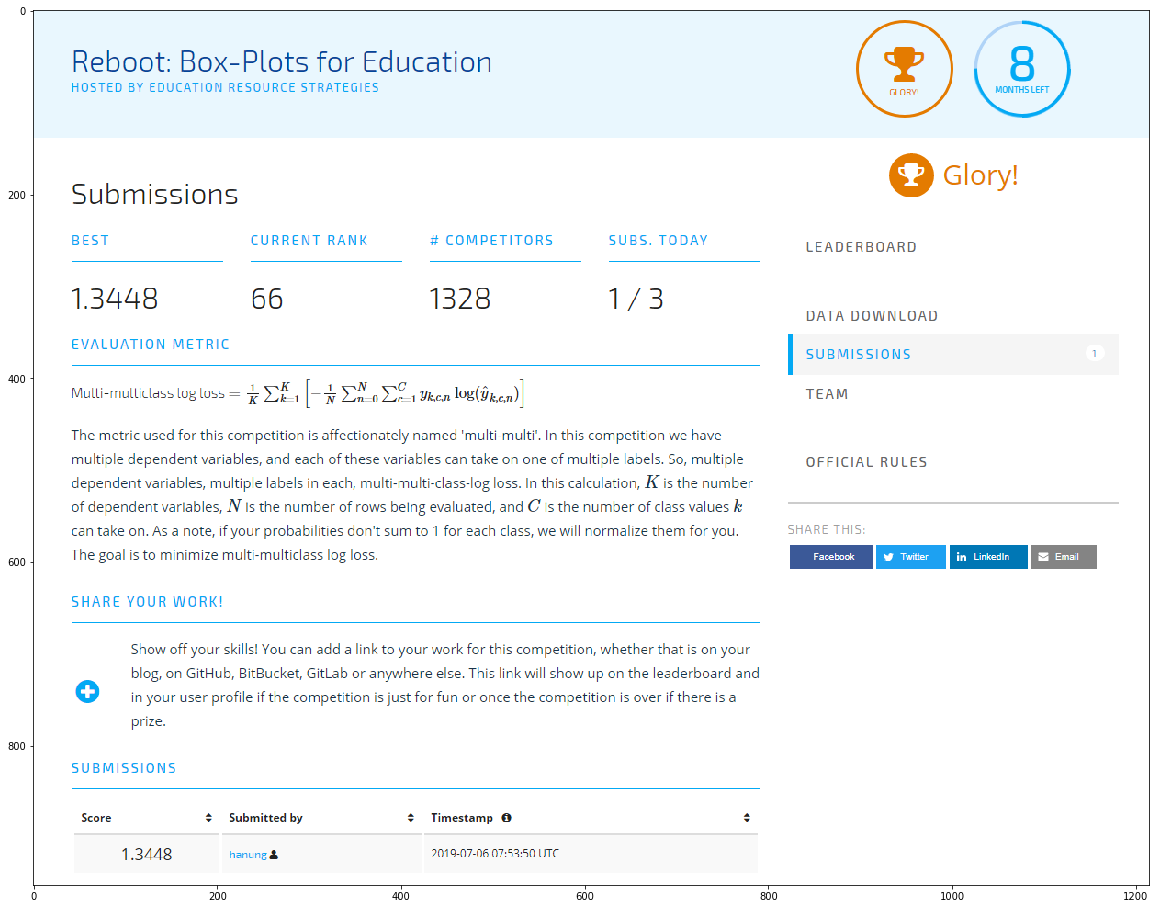

In [0]:
plt.figure(figsize=(20,20))
plt.imshow(result_data)

In [0]:
66/1328 * 100

4.969879518072289

[Submit result](https://drive.google.com/open?id=1OWgjOOZN14vgv_gYqmcwf28mstFdkGA3)

## Best model with grid search 

In [30]:
print(numeric_feature[:5])
print(concat_text[:5])
print(train_y_dummy[:5])

                       0         1
Unnamed: 0                        
134338      1.780716e+00  0.102058
206341     -6.760054e-14 -0.026297
326408      1.780716e+00  0.134193
364634     -6.760054e-14 -0.035735
47683      -6.760054e-14 -0.035648
Unnamed: 0
134338    Teacher-Elementary KINDERGARTEN KINDERGARTENGe...
206341    CONTRACTOR SERVICESBOND EXPENDITURESBUILDING F...
326408    Personal Services - TeachersTCHER 2ND GRADEReg...
364634    EMPLOYEE BENEFITSTEACHER SUBSGENERAL FUNDTeach...
47683     TEACHER COVERAGE FOR TEACHERTEACHER SUBSGENERA...
dtype: object
   Function_Aides Compensation  ...  Use_Untracked Budget Set-Aside
0                            0  ...                               0
1                            0  ...                               0
2                            0  ...                               0
3                            0  ...                               0
4                            0  ...                               0

[5 rows x 104 columns

In [0]:
countvec_ngram = CountVectorizer(token_pattern=text_pattern, ngram_range=(1, 3))

In [0]:
count_vec_ngram = countvec_ngram.fit_transform(concat_text)

In [33]:
count_vec_ngram

<400277x157023 sparse matrix of type '<class 'numpy.int64'>'
	with 15903807 stored elements in Compressed Sparse Row format>

In [0]:
X_n_gram = hstack([numeric_feature, count_vec_ngram])

In [35]:
X_n_gram

<400277x157025 sparse matrix of type '<class 'numpy.float64'>'
	with 16704361 stored elements in COOrdinate format>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_n_gram, train_y_dummy, test_size=0.2, random_state=42)

## Grid Search example for different solvers



```
param_grid = [
  {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},  
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]
```



In [0]:
logit_1 = OneVsRestClassifier(LogisticRegression(solver ='lbfgs', random_state=42))
logit_2 = OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C=0.1, random_state=42))
logit_3 = OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C=0.01, random_state=42))
logit_4 = OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C=10, random_state=42))
logit_5 = OneVsRestClassifier(LogisticRegression(solver ='lbfgs', C=100, random_state=42))

In [0]:
for model in [logit_1, logit_2, logit_3]:
  
  model.fit(X_train, y_train)
  train_score = model.score(X_train,y_train)
  test_score = model.score(X_test, y_test)
  print(model.get_params()['estimator__C'], 'Train_score', train_score, 'Test_score', test_score)

1.0 Train_score 0.9487104218648995 Test_score 0.9261267113020886
0.1 Train_score 0.9182502084497893 Test_score 0.9054911561906666


In [0]:
logit_3.fit(X_train, y_train)

In [40]:

train_score = logit_3.score(X_train,y_train)
test_score = logit_3.score(X_test, y_test)
print(logit_3.get_params()['estimator__C'], 'Train_score', train_score, 'Test_score', test_score)


0.01 Train_score 0.8128948444980185 Test_score 0.8058359148595983


In [42]:
logit_4.fit(X_train, y_train)

train_score = logit_4.score(X_train,y_train)
test_score = logit_4.score(X_test, y_test)
print(logit_4.get_params()['estimator__C'], 'Train_score', train_score, 'Test_score', test_score)


10 Train_score 0.9508214639264758 Test_score 0.9274882582192465


In [44]:
logit_5.fit(X_train, y_train)

train_score = logit_5.score(X_train,y_train)
test_score = logit_5.score(X_test, y_test)
print(logit_5.get_params()['estimator__C'], 'Train_score', train_score, 'Test_score', test_score)

100 Train_score 0.9506809359785898 Test_score 0.9268886779254522
